<a href="https://colab.research.google.com/github/sheenayoosaf/100-days-of-code/blob/main/day_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example 1 — Single linear neuron (Regression)

Goal: show how a single neuron with weights `w` and bias `b` produces predictions, compute mean squared error (MSE), and derive gradients `dL/dw` and `dL/db` manually. This example uses small synthetic data.

In [1]:
# Example 1: Single linear neuron (y = w*x + b)
# We'll create a tiny dataset, perform a forward pass, compute MSE loss,
# then compute gradients analytically (backward pass) and take a gradient step.

import numpy as np

# --- Synthetic data ---
# Simple linear relationship y = 2*x + 1 with a bit of noise
np.random.seed(0)
x = np.linspace(-1, 1, 7).reshape(-1, 1)   # shape (7,1)
y_true = 2.0 * x + 1.0 + 0.1 * np.random.randn(*x.shape)

# Model parameters (initialize)
w = np.array([[0.5]])   # shape (1,1)
b = np.array([0.0])     # shape (1,)

# Forward pass
y_pred = x.dot(w) + b    # shape (7,1)
mse = np.mean((y_pred - y_true) ** 2)

print("x:\n", x.flatten())
print("y_true:\n", y_true.flatten())
print("Initial prediction:\n", y_pred.flatten())
print(f"Initial MSE: {mse:.6f}")

# Backward pass (analytical gradients)
# For MSE: L = (1/N) * sum((y_pred - y_true)^2)
# dL/dy_pred = (2/N) * (y_pred - y_true)
N = x.shape[0]
dL_dy = (2.0 / N) * (y_pred - y_true)    # shape (N,1)

# Gradients wrt parameters
# y_pred = x * w + b
# dL/dw = sum( x * dL/dy )
# dL/db = sum( dL/dy )
dL_dw = x.T.dot(dL_dy)                  # shape (1,1)
dL_db = np.sum(dL_dy, axis=0)           # shape (1,)

print("\nGradients:")
print("dL/dw:\n", dL_dw)
print("dL/db:\n", dL_db)

# Take a small gradient step (learning rate)
lr = 0.1
w -= lr * dL_dw
b -= lr * dL_db

# Forward again to see change
y_pred2 = x.dot(w) + b
mse2 = np.mean((y_pred2 - y_true) ** 2)
print(f"\nAfter one gradient step, MSE: {mse2:.6f}")
print("Updated w, b:", w.flatten(), b)

x:
 [-1.         -0.66666667 -0.33333333  0.          0.33333333  0.66666667
  1.        ]
y_true:
 [-0.82359477 -0.29331761  0.43120713  1.22408932  1.85342247  2.23560555
  3.09500884]
Initial prediction:
 [-0.5        -0.33333333 -0.16666667  0.          0.16666667  0.33333333
  0.5       ]
Initial MSE: 2.165717

Gradients:
dL/dw:
 [[-1.29230531]]
dL/db:
 [-2.20640598]

After one gradient step, MSE: 1.567994
Updated w, b: [0.62923053] [0.2206406]


## Example 2 — Two-layer neural network (XOR)

Goal: build a tiny network with one hidden layer (2 neurons), show forward pass, manually compute gradients for the parameters, and train to solve XOR. This network uses sigmoid activation in the hidden layer and linear output. The backward pass is implemented manually for clarity.

Epoch 0, Loss: 0.768948
Epoch 1000, Loss: 0.000000
Epoch 2000, Loss: 0.000000
Epoch 3000, Loss: 0.000006
Epoch 4000, Loss: 0.000000

Final predictions (raw):
 [-2.05391260e-14  1.00000000e+00  1.00000000e+00 -1.77635684e-14]
Final predictions (rounded):
 [-0.  1.  1. -0.]


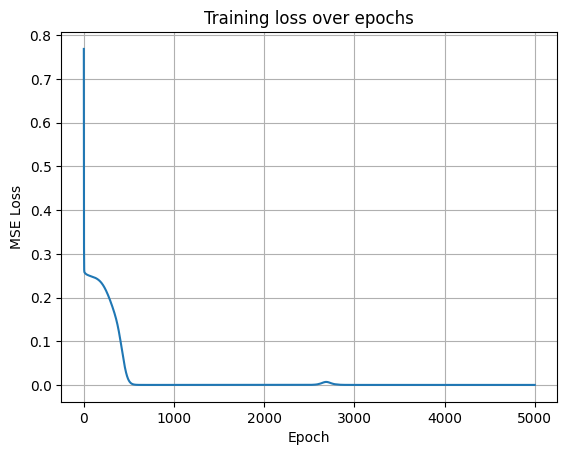

In [2]:
# Example 2: Two-layer network for XOR
# Architecture:
#   input (2) -> Dense(2, sigmoid) -> Dense(1, linear)
# We'll implement forward pass, compute binary MSE loss, and manual backward pass.

import numpy as np
import math
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype=float)   # shape (4,2)
Y = np.array([[0],[1],[1],[0]], dtype=float)  # shape (4,1)

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_derivative(s):
    # s is sigmoid(z)
    return s * (1 - s)

# Initialize parameters (small random)
rng = np.random.RandomState(1)
W1 = rng.randn(2,2) * 0.5   # shape (input_dim, hidden_dim)
b1 = np.zeros((1,2))        # shape (1, hidden_dim)
W2 = rng.randn(2,1) * 0.5   # shape (hidden_dim, output_dim)
b2 = np.zeros((1,1))        # shape (1, output_dim)

def forward(X, W1, b1, W2, b2):
    # X shape (N,2)
    Z1 = X.dot(W1) + b1      # (N,2)
    A1 = sigmoid(Z1)         # (N,2)
    Z2 = A1.dot(W2) + b2     # (N,1)
    y_pred = Z2              # linear output
    cache = (Z1, A1, Z2)
    return y_pred, cache

def compute_loss(y_pred, y_true):
    # MSE loss (works fine for tiny demonstration)
    return np.mean((y_pred - y_true) ** 2)

def backward(X, Y, y_pred, cache, W2):
    # cache contains Z1, A1, Z2
    Z1, A1, Z2 = cache
    N = X.shape[0]
    # dL/dy_pred
    dL_dy = (2.0 / N) * (y_pred - Y)   # (N,1)
    # Gradients for W2 and b2
    dL_dW2 = A1.T.dot(dL_dy)          # (2,1)
    dL_db2 = np.sum(dL_dy, axis=0, keepdims=True)  # (1,1)
    # Backprop into hidden layer
    # dL/dA1 = dL/dy * d(y)/dA1 = dL/dy * W2^T
    dL_dA1 = dL_dy.dot(W2.T)          # (N,2)
    # dL/dZ1 = dL/dA1 * sigmoid'(Z1)
    dL_dZ1 = dL_dA1 * sigmoid_derivative(A1)  # (N,2)
    # Gradients for W1 and b1
    dL_dW1 = X.T.dot(dL_dZ1)          # (2,2)
    dL_db1 = np.sum(dL_dZ1, axis=0, keepdims=True)  # (1,2)
    return dL_dW1, dL_db1, dL_dW2, dL_db2

# Training loop
lr = 0.5
epochs = 5000
loss_history = []

for epoch in range(epochs):
    y_pred, cache = forward(X, W1, b1, W2, b2)
    loss = compute_loss(y_pred, Y)
    loss_history.append(loss)
    dW1, db1, dW2, db2 = backward(X, Y, y_pred, cache, W2)
    # Gradient step
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

# Final results
y_pred_final, _ = forward(X, W1, b1, W2, b2)
print("\nFinal predictions (raw):\n", y_pred_final.flatten())
print("Final predictions (rounded):\n", np.round(y_pred_final.flatten()))

# Plot loss curve
plt.figure()
plt.plot(loss_history)
plt.title('Training loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()